#### Dickey-Fuller test
Null Hypothesis, H0, phi = 1
- p value < 0.05 (not significant), **reject** H0, dataset is stationer
- p value > 0.05 **fail to reject**, dataset is not stationer

#### Granger Causality test
Measuring **causality** between one time series and another time series, in other words whether one time series is useful in forecasting other time series. Keep in mind it is different from correlation.

In [1]:
import numpy as np
import pandas as pd

### Dickey Fuller Test

In [2]:
# load a seasonal dataset
airline_df = pd.read_csv("UDEMY_TSA_FINAL/Data/airline_passengers.csv", index_col='Month', parse_dates=True)
airline_df.index.freq = 'MS'

In [3]:
# load a nonseasonal dataset
birth_df = pd.read_csv("UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv",
                       index_col='Date',
                       parse_dates=True)
birth_df.index.freq = 'D'

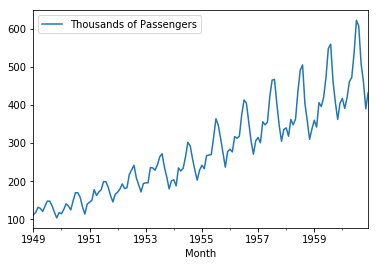

In [4]:
airline_df.plot().autoscale(axis='x', tight=True)

In [5]:
# import augmented Dickey Fuler test
from statsmodels.tsa.stattools import adfuller

In [6]:
adfuller(airline_df['Thousands of Passengers'])

(0.8153688792060452,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [7]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [8]:
airline_test = adfuller(airline_df['Thousands of Passengers'])
airline_out = pd.Series(airline_test[0:4],
                        index = ['ADF Test Statistic', 'p-value',
                                'Lags Used', 'Num of Obeservations'])

In [9]:
airline_out

ADF Test Statistic        0.815369
p-value                   0.991880
Lags Used                13.000000
Num of Obeservations    130.000000
dtype: float64

In [10]:
for key, val in airline_test[4].items():
    airline_out[f'Critical Value ({key})'] = val
    
airline_out['Maximized IC'] = airline_test[5]

In [11]:
airline_out

ADF Test Statistic        0.815369
p-value                   0.991880
Lags Used                13.000000
Num of Obeservations    130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
Maximized IC            996.692931
dtype: float64

In [12]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    
    out['Maximized IC'] = result[5]
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [13]:
adf_test(airline_df['Thousands of Passengers'], title='Airline Dataset')

Augmented Dickey-Fuller Test: Airline Dataset
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Maximized IC            996.692931
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [14]:
# test stationary for birth_df
adf_test(birth_df['Births'], title='Daily Female Birth Dataset')

Augmented Dickey-Fuller Test: Daily Female Birth Dataset
ADF test statistic        -4.808291
p-value                    0.000052
# lags used                6.000000
# observations           358.000000
critical value (1%)       -3.448749
critical value (5%)       -2.869647
critical value (10%)      -2.571089
Maximized IC            2343.829093
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [15]:
samples_df = pd.read_csv("UDEMY_TSA_FINAL/Data/samples.csv", index_col=0, parse_dates=True)
samples_df.index.freq = 'MS'

In [16]:
samples_df

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
1950-06-01,55,16,19,60
1950-07-01,60,24,24,53
1950-08-01,54,16,33,71
1950-09-01,49,25,44,63
1950-10-01,65,27,60,46


### Granger Causality

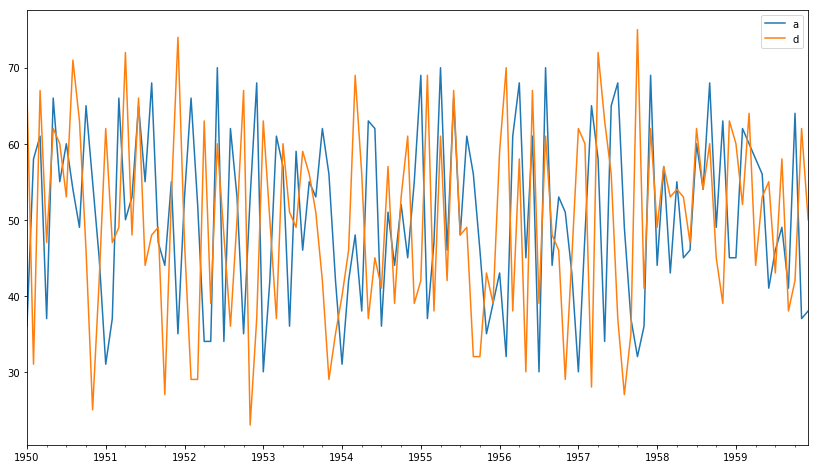

In [17]:
samples_df[['a', 'd']].plot(figsize=(14, 8)).autoscale(axis='x', tight=True)

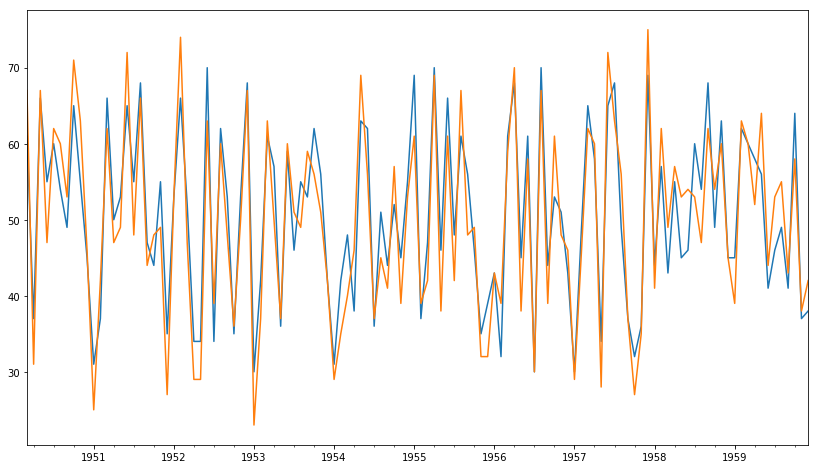

In [18]:
# let's plot column 'a' from index 2
samples_df['a'][2:].plot(figsize=(14, 8), label=True).autoscale(axis='x', tight=True)
# and then shift column 'd' as much as 2
samples_df['d'].shift(2).plot(label=True)

We see that the two lines almost overlap with the naked eye. It can be said that two days after the change in 'd', 'a' will reflect that. 'd' has causality on 'a'.

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

In [20]:
grangercausalitytests(samples_df[['a', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [21]:
grangercausalitytests(samples_df[['b', 'd']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7084  , p=0.5879  

{1: ({'ssr_ftest': (1.522527109860949, 0.21973160603883238, 116.0, 1),
   'ssr_chi2test': (1.5619028109780422, 0.21138682952678398, 1),
   'lrtest': (1.5517414581130424, 0.21287853854124358, 1),
   'params_ftest': (1.5225271098609752, 0.2197316060388221, 116.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.43504441349137973, 0.6483153418342469, 113.0, 2),
   'ssr_chi2test': (0.9085883326014657, 0.6348959407830008, 2),
   'lrtest': (0.9051081656513134, 0.636001674473408, 2),
   'params_ftest': (0.4350444134914038, 0.6483153418342305, 113.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5333223212193159, 0.6603817798496363, 110.0, 3),
   'ssr_chi2test': (1.701783043163453, 0.636537457097426, 3),
   'lrtest': (1.6895254112311022, 0.6392650421085297, 3),
   'params_ftest': (0.5333223212193047, 0.6603817798496421, 110.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

for a very small p value (less than 0.05) indicates strong evidence that there is causality between the two time series data.

In [22]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20, 30, (50, 2)), columns=['test', 'predictions'])

In [23]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


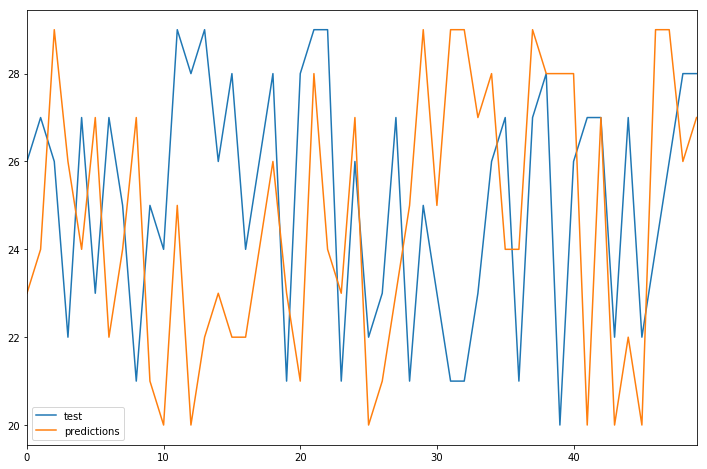

In [25]:
df.plot(figsize=(12, 8)).autoscale(axis='x', tight=True)

In [26]:
# use mse, rmse, mean absolute from statsmodels
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [27]:
rmse(df['test'], df['predictions'])

4.125530268947253

In [28]:
airline_df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [29]:
# monthly plot to see seasonality
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

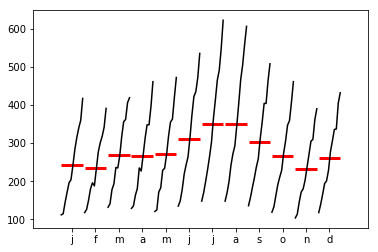

In [31]:
month_plot(airline_df['Thousands of Passengers']);

In [33]:
# quarter plot
# create quarter dataframe, by resamplin to quarter
airline_df_q = airline_df['Thousands of Passengers'].resample(rule='Q').mean()

In [34]:
airline_df_q

Month
1949-03-31    120.666667
1949-06-30    128.333333
1949-09-30    144.000000
1949-12-31    113.666667
1950-03-31    127.333333
1950-06-30    136.333333
1950-09-30    166.000000
1950-12-31    129.000000
1951-03-31    157.666667
1951-06-30    171.000000
1951-09-30    194.000000
1951-12-31    158.000000
1952-03-31    181.333333
1952-06-30    194.000000
1952-09-30    227.000000
1952-12-31    185.666667
1953-03-31    209.333333
1953-06-30    235.666667
1953-09-30    257.666667
1953-12-31    197.333333
1954-03-31    209.000000
1954-06-30    241.666667
1954-09-30    284.666667
1954-12-31    220.333333
1955-03-31    247.333333
1955-06-30    284.666667
1955-09-30    341.000000
1955-12-31    263.000000
1956-03-31    292.666667
1956-06-30    335.000000
1956-09-30    391.000000
1956-12-31    294.333333
1957-03-31    324.000000
1957-06-30    375.000000
1957-09-30    445.333333
1957-12-31    329.333333
1958-03-31    340.000000
1958-06-30    382.000000
1958-09-30    466.666667
1958-12-31    335.3

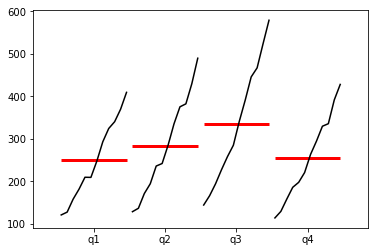

In [36]:
quarter_plot(airline_df_q);